### input

`t` : time asked

`avg_ang_sp` : average speed to finish a full orbit

`sma` : semimajor axis

`ecc` : eccentricy

![architecture.png](attachment:image.png)

### step
1. calculate M using t
2. calculate E using M
3. calculate theta using E
4. calculate r using theta, a, e

In [2]:
pip install kepler.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 1.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import kepler

G = 6.674*1e-11 #m^3 kg^-1 s^-2
s_in_year = 3.154e+7 # s_in_year s = 1 year
Msun_in_kg = 1.98847e+30 # Msun_in_kg kg = 1 Msun
Mjup_in_kg = 1.898e+27 # Mjup_in_kg kg = 1 Mjup
au_in_m = 149597870700 # au_in_m m = 1 au


def atop_sunjup(a, M, m):
    """
    Converts semimajor axis to period, with the units in au, solar mass (larger), and jupiter mass (smaller).
    Returning period in the unit of second.
    Usage: atop_sunjup(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a*au_in_m)**3 * 4 * np.pi**2)/(G*((M*Msun_in_kg)+(m*Mjup_in_kg))))**0.5
    print(f'P = ', P / s_in_year, ' years')
    return P

def atop_sunsun(a, M, m):
    """
    Converts semimajor axis to period, with the units in au, solar mass (larger and smaller).
    Returning period in the unit of second.
    Usage: atop_sunsun(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a*au_in_m)**3 * 4 * np.pi**2)/(G*((M*Msun_in_kg)+(m*Msun_in_kg))))**0.5
    print(f'P = ', P / s_in_year, ' years')
    return P

def atop_si(a, M, m):
    """
    Converts semimajor axis to period, with the units in m and kg (all bodies).
    Returning period in the unit of second.
    Usage: atop_si(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a)**3 * 4 * np.pi**2)/(G*((M)+(m))))**0.5
    #print(f'P = ', P / s_in_year, ' years')
    return P #in second

def ptoa_sunjup(P,M,m):
    """
    Converts period to semimajor axis, with the units in year, solar mass (larger), and jupiter mass (smaller).
    Returning semimajor axis in the unit of m.
    Usage: ptoa_sunjup(period, larger_mass, smaller_mass)
    """
    a = (((P*s_in_year)**2 * G * ((M*Msun_in_kg)+(m*Mjup_in_kg)))/(4 * np.pi**2))**(1/3)
    print(f'a = ', a/au_in_m, 'au')
    return a

def ptoa_si(P,M,m):
    """
    Converts period to semimajor axis, with the units in s and kg (all bodies).
    Returning semimajor axis in the unit of m.
    Usage: ptoa_si(period, larger_mass, smaller_mass)
    """
    a = ((P**2 * G * (M+m))/(4 * np.pi**2))**(1/3)
    print(f'a = ', a/au_in_m, 'au')
    return a

In [4]:
def arcocos(costheta):
    """
    Calculate the arccosine of an angle to give a full-circle angle (0-2pi).
    Input: cos_angle in float list
    Output: angle (rad)
    Usage: arcocos(cos_angle)
    """
    theta = np.arccos(costheta)
    tarr = []
    for i in range(0,len(theta)):
        if i == 0:
            tarr.append(theta[i])
        elif i == 1:
            selisih = theta[i] - theta[i-1]
            indi = np.sign(selisih)
            tarr.append(theta[i])
        else:
            selisih = theta[i] - theta[i-1]
            indi2 = np.sign(selisih)
            if indi2 != indi:
                theta = 2*np.pi - theta
                tarr.append(theta[i])
            else:
                tarr.append(theta[i])
    tarr = np.array(tarr)
    return(tarr)

def avg_ang_speed(per):
    """
    Calculate average angular speed of the smaller body.
    Input: period (s).
    Output: average angular speed, in rad/s.
    Usage: avg_ang_speed(period)
    """
    avg_ang_sp = 2*np.pi/per # rad / s
    return avg_ang_sp

def mean_anomaly(t, avg_ang_sp):
    """
    Calculate the mean anomaly of the smaller body, at each time in the orbit.
    Input: time (s), average angular speed (rad/s)
    Output: mean anomaly (rad)
    Usage: mean_anomaly(time, avg_ang_speed)
    """
    mean_anom = avg_ang_sp * t
    return mean_anom

def kepler_solve(mean_anom, ecc):
    """
    Solve the Kepler equation.
    Input: mean anomaly (rad), eccentricity
    Output: eccentric anomaly (rad), true anomaly (rad)
    Usage: kepler_solve(mean_anomaly, eccentricity)
    """
    ecc_anom, cos_TA, sin_TA = kepler.kepler(mean_anom, ecc)
    true_anom = arcocos(cos_TA)
    return ecc_anom, true_anom

def pos(sma, ecc, true_anomaly):
    """
    Calculate the position (r, theta) of a body in the orbit.
    Input: semimajor axis (any unit), eccentricity, true anomaly (rad)
    Output: r (related unit), true anomaly (rad)
    Usage: pos(semimajor_axis, eccentricity, true_anomaly)
    """
    r = sma * (1 - ecc**2) / (1 + ecc * np.cos(true_anomaly))
    return r, true_anomaly

def radial_velocity(true_anom, omega, ecc, gamma, sma, incl, mass1, mass2):
    """
    Calculate the radial velocity of the smaller body around the larger body.
    Input: true anomaly (rad), omega (rad), eccentricity, gamma (m/s), period (s), inclination (rad), larger mass (kg), smaller mass (kg)
    Output: radial velocity (m/s)
    Usage: radial_velocity(true_anomaly, omega, eccentricity, gamma, period, inclination, larger_mass, smaller_mass)
    """
    G = 6.6743*1e-11 #m3 kg-1 s-2
    K = np.sqrt(G/(1-ecc**2))*mass2*np.sin(incl)*((mass1+mass2)**(-0.5))*sma**(-0.5)
    rad_vel = K * (np.cos(true_anom + omega) + (ecc * np.cos(omega))) + gamma
    return rad_vel

def ind_radial_velocity(true_anom, omega, ecc, gamma, sma, incl, mass_obj, mass_total):
    """
    Calculate the individual radial velocity of each body towards the system barycenter. Can be used to calculate the relative radial velocity.
    Input: true anomaly (rad), omega (rad), eccentricity, gamma (m/s), period (s), inclination (rad), larger mass (kg), smaller mass (kg)
    Output: individual radial velocity (m/s)
    Usage: radial_velocity(true_anomaly, omega, eccentricity, gamma, semimajor axis of the object, inclination, mass_obj, total_mass)
    """
    G = 6.6743*1e-11 #m3 kg-1 s-2
    K = np.sqrt(G/(1-ecc**2))*mass_obj*np.sin(incl)*((mass_total)**(-0.5))*(sma**(-0.5))
    rad_vel = K * (np.cos(true_anom + omega) + (ecc * np.cos(omega))) + gamma
    return rad_vel

# radial velocity, calculated from youtube

what we need:
* true anomaly <br>
`ecc_anom, true_anom = kepler_solve(mean_anom, ecc)`
* argument of periastron
* eccentricity

In [5]:
m_A = 1.05 * 2e+30 # kg

m_a = 70 * 2e+27
m_b = 1 * 2e+27

sma_ab = 0.8 * 1e+11 #m
ecc_ab = 0.4
incl_ab = np.deg2rad(90)
period_ab = atop_si(sma_ab, m_a, m_b)
omega_ab = np.deg2rad(-50)

sma_A_a = 20 * 1.5e+11 # m
ecc_A_a = 0.377
incl_A_a = np.deg2rad(89.1) # deg
period_A_a = atop_si(sma_A_a, m_A, m_a+m_b)
omega_A_a = np.deg2rad(200.3)

t0 = 2467400
tend = (t0 + (period_A_a/3600/24)*5)


time = np.arange(t0*24*3600, tend*24*3600, 1*24*3600)

### calculate A-Ab system

In [6]:
avg_ang_sp_hd_ab = avg_ang_speed(period_ab)
mean_anom_hd_ab = mean_anomaly(time,  avg_ang_sp_hd_ab)
ecc_anom_ab, true_anom_ab = kepler_solve(mean_anom_hd_ab, ecc_ab)

pos_obj_ab, TeA_obj_ab = pos(sma_ab, ecc_ab, true_anom_ab)
pos_obj_ba, TeA_obj_ba = pos(sma_ab, ecc_ab, true_anom_ab-np.pi)

rad_vel_a_b = radial_velocity(TeA_obj_ab, omega_ab, ecc_ab, 25, sma_ab, incl_ab, m_a, m_b)
rad_vel_b_a = radial_velocity(TeA_obj_ba, omega_ab, ecc_ab, 25, sma_ab, incl_ab, m_b, m_a)

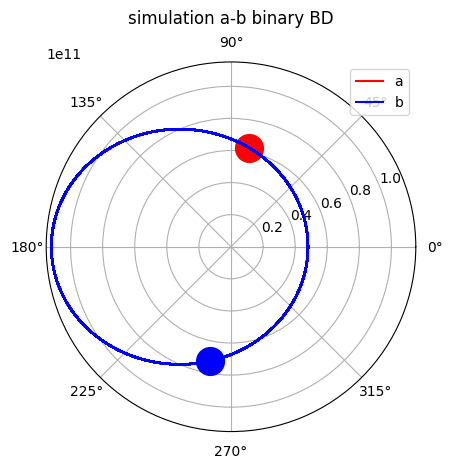

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(TeA_obj_ab, pos_obj_ab, 'r-', label='a')
ax.plot(TeA_obj_ab[0], pos_obj_ab[0], 'ro', markersize=20)
#ax.vlines(TeA_obj_ab[0], 0, pos_obj_ab[0], colors='r', zorder=3)

ax.plot(TeA_obj_ba, pos_obj_ba, 'b-', label='b')
ax.plot(TeA_obj_ba[0], pos_obj_ba[0], 'bo', markersize=20)
#ax.vlines(TeA_obj_ba[0], 0, pos_obj_ba[0], colors='b', zorder=3)
ax.legend()
ax.grid(True)

ax.set_title("simulation a-b binary BD", va='bottom')
plt.show()

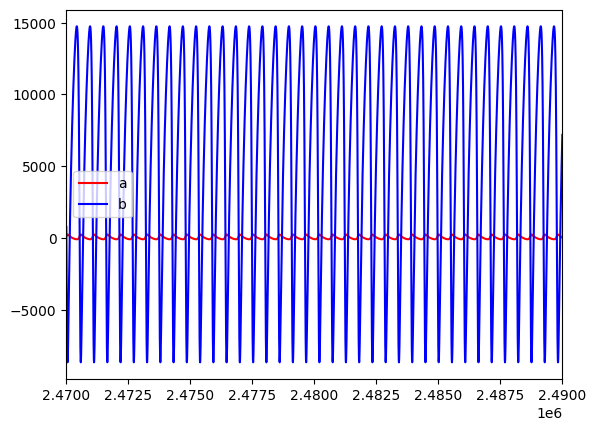

In [8]:
#diff_AAb = np.abs(df_rvdata['jd'][df_rvdata['RV'].idxmax()] - time_AAb[np.argmax(rad_vel_AAb)]/24/3600)
plt.plot(time/24/3600, rad_vel_a_b, 'r-', label='a')
plt.plot(time/24/3600, rad_vel_b_a, 'b-', label='b')
#plt.errorbar(df_rvdata['jd'], df_rvdata['RV'], df_rvdata['eRV'], fmt='.')
plt.xlim(2470000, 2490000)
plt.legend()

### calculate (a-b) - A system

a-b orbiting A

In [9]:
avg_ang_sp_hd_Aab = avg_ang_speed(period_A_a)
mean_anom_hd_Aab = mean_anomaly(time,  avg_ang_sp_hd_Aab)
ecab_Anom_Aab, true_anom_Aab = kepler_solve(mean_anom_hd_Aab, ecc_A_a)

pos_obj_A_ab, TeA_obj_A_ab = pos(sma_A_a, ecc_A_a, true_anom_Aab)
pos_obj_ab_A, TeA_obj_ab_A = pos(sma_A_a, ecc_A_a, true_anom_Aab-np.pi)

rad_vel_A_ab = radial_velocity(TeA_obj_A_ab, omega_A_a, ecc_A_a, 25, sma_A_a, incl_A_a, m_A, m_a+m_b)

rad_vel_ab_A = radial_velocity(TeA_obj_ab_A, omega_A_a, ecc_A_a, 25, sma_A_a, incl_A_a, m_a+m_b, m_A)

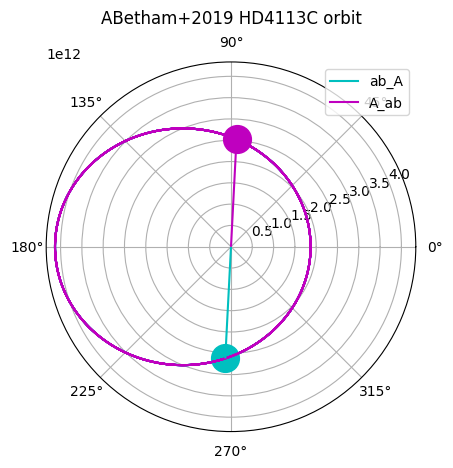

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(TeA_obj_ab_A, pos_obj_ab_A, 'c-', label='ab_A')
ax.plot(TeA_obj_ab_A[0], pos_obj_ab_A[0], 'co', markersize=20)
ax.vlines(TeA_obj_ab_A[0], 0, pos_obj_ab_A[0], colors='c', zorder=3)

ax.plot(TeA_obj_A_ab, pos_obj_A_ab, 'm-', label='A_ab')
ax.plot(TeA_obj_A_ab[0], pos_obj_A_ab[0], 'mo', markersize=20)
ax.vlines(TeA_obj_A_ab[0], 0, pos_obj_A_ab[0], colors='m', zorder=3)


#ax.plot(TeA_obj_ab, pos_obj_ab, 'b-', label='a-b')
#ax.plot(TeA_obj_ab[0], pos_obj_ab[0], 'bo')
#ax.vlines(TeA_obj_ab[0], 0, pos_obj_ab[0], colors='b', zorder=3)


ax.legend()
ax.grid(True)

plt.show()

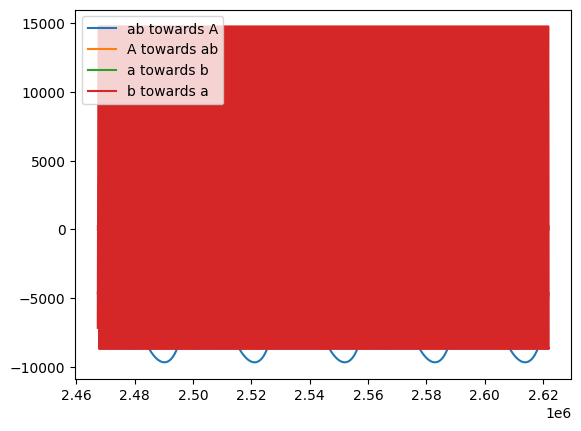

In [11]:
#diff_AAb = np.abs(df_rvdata['jd'][df_rvdata['RV'].idxmax()] - time_AAb[np.argmax(rad_vel_AAb)]/24/3600)
plt.plot(time/24/3600, rad_vel_ab_A, label='ab towards A')
plt.plot(time/24/3600, rad_vel_A_ab, label='A towards ab')
plt.plot(time/24/3600, rad_vel_a_b, label='a towards b')
plt.plot(time/24/3600, rad_vel_b_a, label='b towards a')
plt.legend()
#plt.errorbar(df_rvdata['jd'], df_rvdata['RV'], df_rvdata['eRV'], fmt='.')
#plt.xlim(2411000, 2412000)

Text(0, 0.5, 'radial velocity (m/s)')

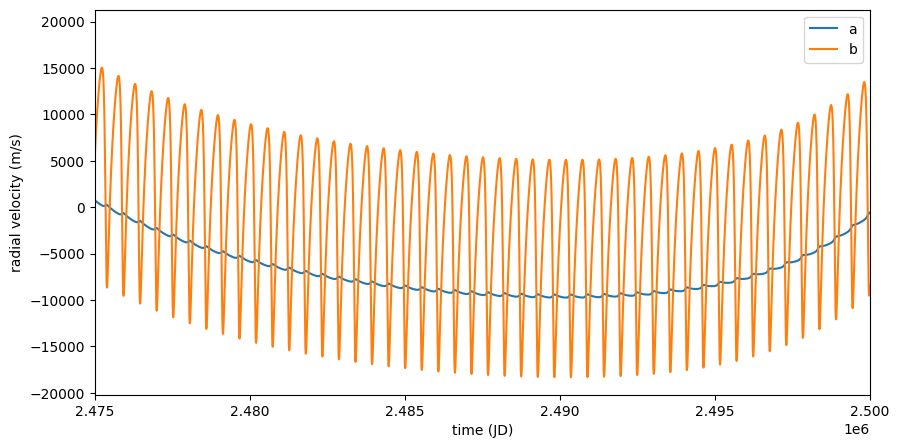

In [12]:
joined_rv_a = rad_vel_ab_A + rad_vel_a_b
joined_rv_b = rad_vel_ab_A + rad_vel_b_a

plt.subplots(figsize=(10, 5))
plt.plot(time/24/3600, joined_rv_a, label='a')
plt.plot(time/24/3600, joined_rv_b, label='b')
plt.legend()
plt.xlim(2475000, 2500000)
plt.xlabel('time (JD)')
plt.ylabel('radial velocity (m/s)')

In [ ]:
print(period_ab / 3600 / 24, 'days')
print(period_A_a / 3600 / 24, 'days')

534.5198440362755 days
30891.36526519955 days


# relative orbits

### a-b

In [13]:
fracmass_ab = m_a / m_b
sma_a = sma_ab / (1+fracmass_ab)
sma_b = sma_ab - sma_a

avg_ang_sp_hd_ab = avg_ang_speed(period_ab)
mean_anom_hd_ab = mean_anomaly(time,  avg_ang_sp_hd_ab)
ecc_anom_ab, true_anom_ab = kepler_solve(mean_anom_hd_ab, ecc_ab)

pos_obj_a, TeA_obj_a = pos(sma_a, ecc_ab, true_anom_ab)
pos_obj_b, TeA_obj_b = pos(sma_b, ecc_ab, true_anom_ab-np.pi)

rad_vel_a = ind_radial_velocity(TeA_obj_a, omega_ab, ecc_ab, 25, sma_a, incl_ab, m_b, m_a+m_b)
rad_vel_b = ind_radial_velocity(TeA_obj_b, omega_ab, ecc_ab, 25, sma_b, incl_ab, m_a, m_a+m_b)

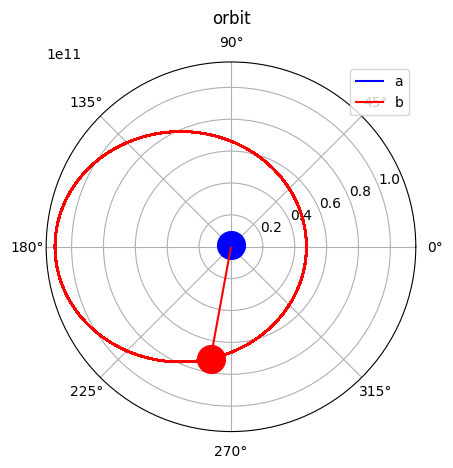

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(TeA_obj_a, pos_obj_a, 'b-', label='a')
ax.plot(TeA_obj_a[0], pos_obj_a[0], 'bo', markersize=20)
ax.vlines(TeA_obj_a[0], 0, pos_obj_a[0], colors='b', zorder=3)
ax.plot(TeA_obj_b, pos_obj_b, 'r-', label='b')
ax.plot(TeA_obj_b[0], pos_obj_b[0], 'ro', markersize=20)
ax.vlines(TeA_obj_b[0], 0, pos_obj_b[0], colors='r', zorder=3)

#ax.plot(TeA_obj_ab, pos_obj_ab, 'k-', label='a')
#ax.plot(TeA_obj_ab[0], pos_obj_ab[0], 'ko', markersize=20)

ax.legend()
ax.grid(True)

ax.set_title("orbit", va='bottom')
plt.show()

Text(0, 0.5, 'Radial Velocity (m/s)')

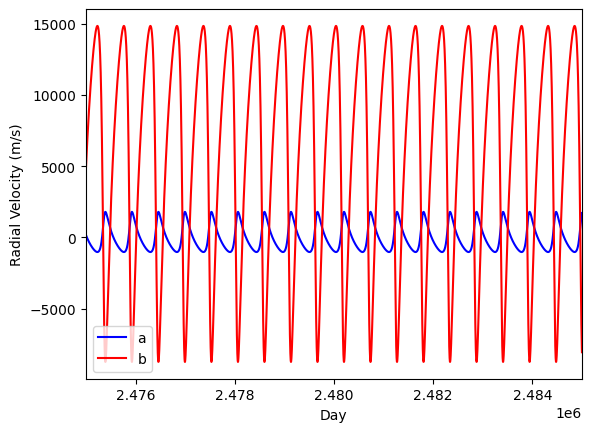

In [15]:
plt.plot(time/24/3600, rad_vel_a, 'b-', label='a')
plt.plot(time/24/3600, rad_vel_b, 'r-', label='b')
#plt.plot(time/24/3600, rel_rv_bra, 'k--', label='relRV')
#plt.errorbar(df['jd'], df['relRV'], df['eRV'], fmt='.', label='Data')
plt.legend()
plt.xlim(2475000, 2485000)
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')

In [16]:
rel_rv_ab = rad_vel_b - rad_vel_a

Text(0, 0.5, 'Radial Velocity (m/s)')

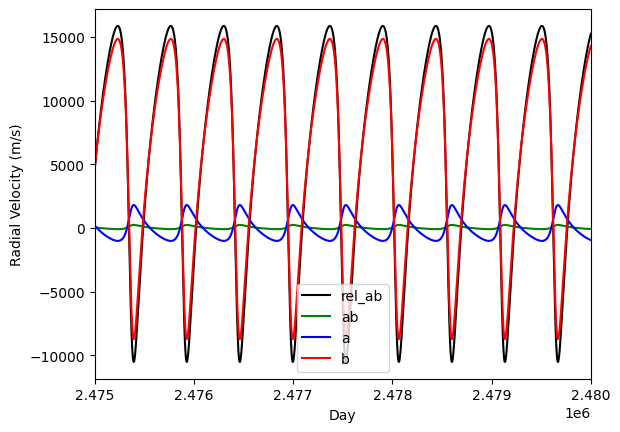

In [17]:
plt.plot(time/24/3600, rel_rv_ab, 'k-', label='rel_ab')
plt.plot(time/24/3600, rad_vel_a_b, 'g-', label='ab')
plt.plot(time/24/3600, rad_vel_a, 'b-', label='a')
plt.plot(time/24/3600, rad_vel_b, 'r-', label='b')
plt.legend()
plt.xlim(2475000, 2480000)
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')

### (a-b)-A

In [18]:
fracmass_A_ab = m_A / (m_a+m_b)
sma_A = sma_A_a / (1+fracmass_A_ab)
sma_ab = sma_A_a - sma_A

avg_ang_sp_hd_A_ab = avg_ang_speed(period_A_a)
mean_anom_hd_A_ab = mean_anomaly(time,  avg_ang_sp_hd_A_ab)
ecc_anom_A_ab, true_anom_A_ab = kepler_solve(mean_anom_hd_A_ab, ecc_A_a)

pos_obj_A, TeA_obj_A = pos(sma_A, ecc_A_a, true_anom_A_ab)
pos_obj_ab, TeA_obj_ab = pos(sma_ab, ecc_A_a, true_anom_A_ab-np.pi)

rad_vel_A = ind_radial_velocity(true_anom_A_ab, omega_A_a, ecc_A_a, 25, sma_A, incl_A_a, m_a+m_b, m_A+m_a+m_b)
rad_vel_ab = ind_radial_velocity(true_anom_A_ab-np.pi, omega_A_a, ecc_A_a, 25, sma_ab, incl_A_a, m_A, m_A+m_a+m_b)

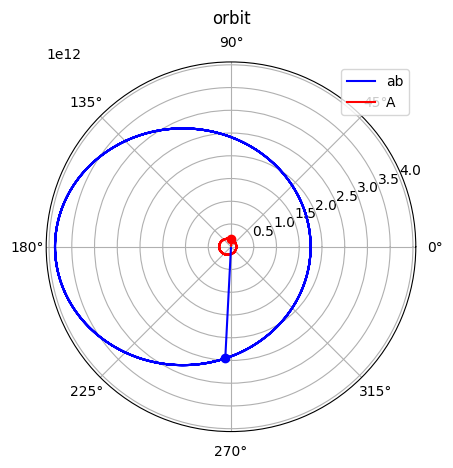

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(TeA_obj_ab, pos_obj_ab, 'b-', label='ab')
ax.plot(TeA_obj_ab[0], pos_obj_ab[0], 'bo')
ax.vlines(TeA_obj_ab[0], 0, pos_obj_ab[0], colors='b', zorder=3)
ax.plot(TeA_obj_A, pos_obj_A, 'r-', label='A')
ax.plot(TeA_obj_A[0], pos_obj_A[0], 'ro')
ax.vlines(TeA_obj_A[0], 0, pos_obj_A[0], colors='r', zorder=3)
ax.legend()
ax.grid(True)

ax.set_title("orbit", va='bottom')
plt.show()

Text(0, 0.5, 'Radial Velocity (m/s)')

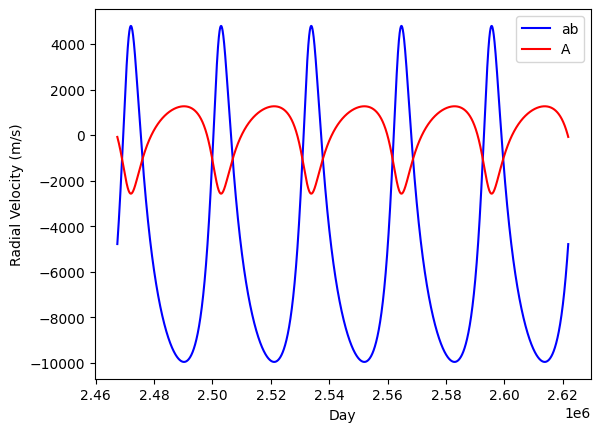

In [20]:
plt.plot(time/24/3600, rad_vel_ab, 'b-', label='ab')
plt.plot(time/24/3600, rad_vel_A, 'r-', label='A')
#plt.plot(time/24/3600, rel_rv_bra, 'k--', label='relRV')
#plt.errorbar(df['jd'], df['relRV'], df['eRV'], fmt='.', label='Data')
plt.legend()
#plt.xlim(2450000, 2500000)
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')

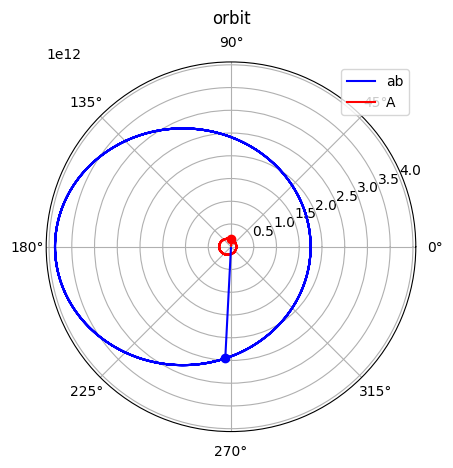

In [21]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(TeA_obj_ab, pos_obj_ab, 'b-', label='ab')
ax.plot(TeA_obj_ab[0], pos_obj_ab[0], 'bo')
ax.vlines(TeA_obj_ab[0], 0, pos_obj_ab[0], colors='b', zorder=3)

ax.plot(TeA_obj_A, pos_obj_A, 'r-', label='A')
ax.plot(TeA_obj_A[0], pos_obj_A[0], 'ro')
ax.vlines(TeA_obj_A[0], 0, pos_obj_A[0], colors='r', zorder=3)
ax.legend()
ax.grid(True)

ax.set_title("orbit", va='bottom')
plt.show()

In [38]:
rel_rv_ab = rad_vel_b - rad_vel_a


In [37]:
rv_Aa = rad_vel_ab + rad_vel_a
rv_Ab = rad_vel_ab + rad_vel_b
rel_rv_Aab = rad_vel_ab+rel_rv_ab

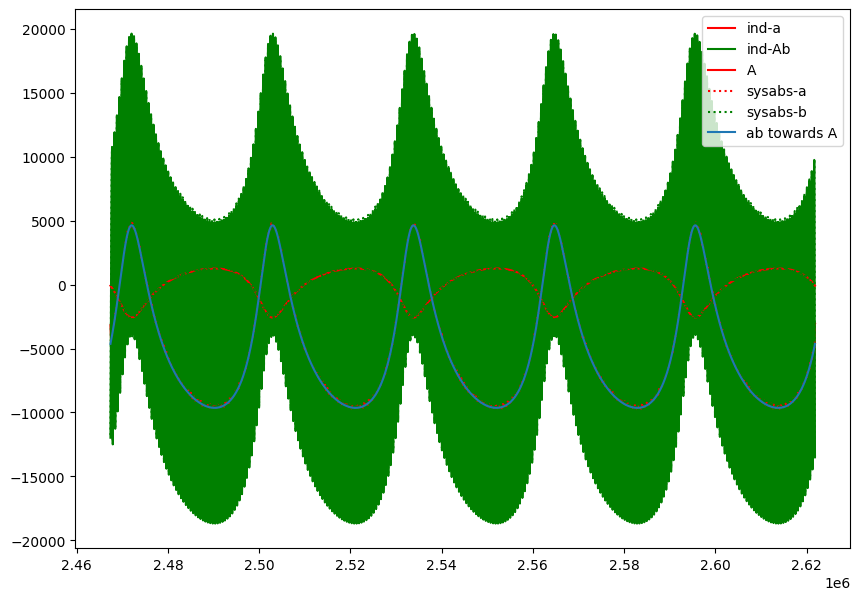

In [30]:
plt.subplots(figsize=(10, 7))
plt.plot(time / 24 / 3600, rv_Aa, 'r-', label='ind-a')
plt.plot(time / 24 / 3600, rv_Ab, 'g-', label='ind-Ab')
plt.plot(time/24/3600, rad_vel_A, 'r-', label='A')
#plt.plot(time / 24 / 3600, rel_rv_Aab, 'k-', label='relAab')
plt.plot(time/24/3600, joined_rv_a, 'r:', label='sysabs-a')
plt.plot(time/24/3600, joined_rv_b, 'g:', label='sysabs-b')
plt.plot(time/24/3600, rad_vel_ab_A, label='ab towards A')
#plt.plot(time/24/3600, joined_rv, label='A-ab')
#plt.xlim(2475000, 2525000)
plt.legend()
#plt.plot(time / 24 / 3600, rad_vel_A+rv_Aa+rv_Ab, 'b-')
#plt.xlim(2475000, 2500000)
#plt.ylim(100000, 200000)

Text(0, 0.5, 'RV (m/s)')

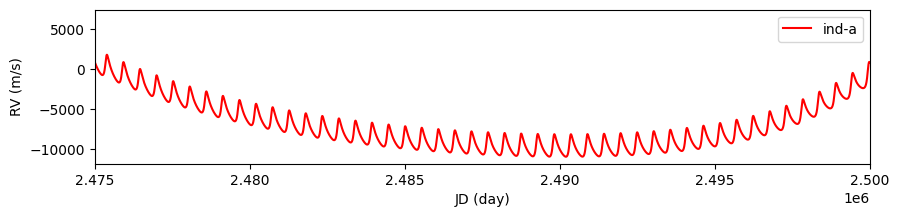

In [47]:
plt.subplots(figsize=(10, 2))
plt.plot(time / 24 / 3600, rv_Aa, 'r-', label='ind-a')
#plt.plot(time / 24 / 3600, rv_Ab, 'g-', label='ind-b')
#plt.plot(time / 24 / 3600, rad_vel_A, 'r-', label='ind-A')
##plt.plot(time / 24 / 3600, rel_rv_Aab, 'k-', label='rel(ind(ab))')
##plt.plot(time/24/3600, rad_vel_ab_A, ':', label='ab towards A')
##plt.plot(time/24/3600, joined_rv, label='A-ab')
plt.xlim(2475000, 2500000)
#plt.ylim(-10000,5000)
plt.legend()
#plt.plot(time / 24 / 3600, rad_vel_A+rv_Aa+rv_Ab, 'b-')
#plt.xlim(2475000, 2500000)
#plt.ylim(100000, 200000)

plt.xlabel('JD (day)')
plt.ylabel('RV (m/s)')

Text(0, 0.5, 'RV (m/s)')

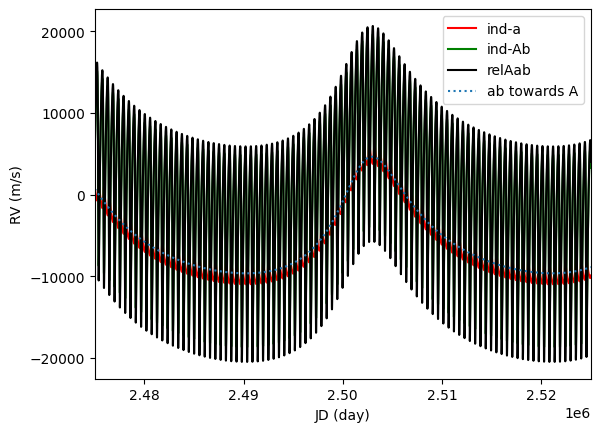

In [26]:
#plt.subplots(figsize=(7, 2))
plt.plot(time / 24 / 3600, rv_Aa, 'r-', label='ind-a')
plt.plot(time / 24 / 3600, rv_Ab, 'g-', label='ind-b')
plt.plot(time / 24 / 3600, rel_rv_Aab, 'k-', label='relAab')
plt.plot(time/24/3600, rad_vel_ab_A, ':', label='ab towards A')
#plt.plot(time/24/3600, joined_rv, label='A-ab')
plt.xlim(2475000, 2525000)
plt.legend()
#plt.plot(time / 24 / 3600, rad_vel_A+rv_Aa+rv_Ab, 'b-')
#plt.xlim(2475000, 2500000)
#plt.ylim(100000, 200000)

plt.xlabel('JD (day)')
plt.ylabel('RV (m/s)')